## Introduction


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
x = iris.data[:, 2:]
y = iris['target']

In [5]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(x, y)

DecisionTreeClassifier()

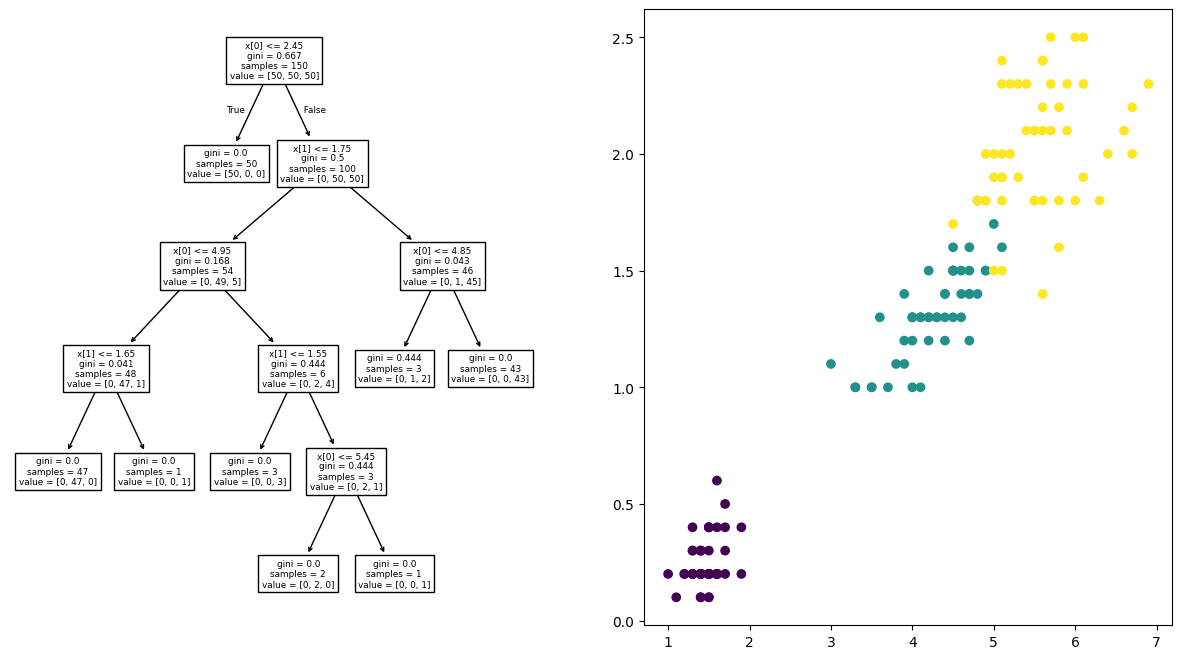

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
tree.plot_tree(tree_clf, ax = ax[0])
ax[1].scatter(x[:, 0], x[:, 1], c=y)

## Decision trees problem - overfitting

In [7]:
from sklearn.datasets import make_blobs

In [8]:
x, y = make_blobs(n_samples= 100, n_features= 2, centers= 2, cluster_std=3  , random_state=0)

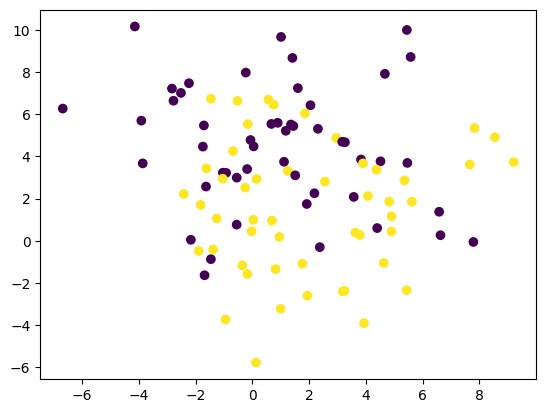

In [9]:
plt.scatter(x[:, 0], x[:,1], c=y)

[Text(0.7004310344827587, 0.9615384615384616, 'x[1] <= 3.665\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4698275862068966, 0.8846153846153846, 'x[1] <= -0.965\ngini = 0.432\nsamples = 57\nvalue = [18, 39]'),
 Text(0.5851293103448276, 0.9230769230769231, 'True  '),
 Text(0.3620689655172414, 0.8076923076923077, 'x[0] <= -1.316\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.3275862068965517, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.39655172413793105, 0.7307692307692307, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.5775862068965517, 0.8076923076923077, 'x[0] <= 6.099\ngini = 0.478\nsamples = 43\nvalue = [17, 26]'),
 Text(0.46551724137931033, 0.7307692307692307, 'x[0] <= 3.597\ngini = 0.46\nsamples = 39\nvalue = [14.0, 25.0]'),
 Text(0.3448275862068966, 0.6538461538461539, 'x[0] <= 1.38\ngini = 0.497\nsamples = 28\nvalue = [13, 15]'),
 Text(0.27586206896551724, 0.5769230769230769, 'x[0] <= -0.107\ngini = 0.463\nsamples = 22\nvalue

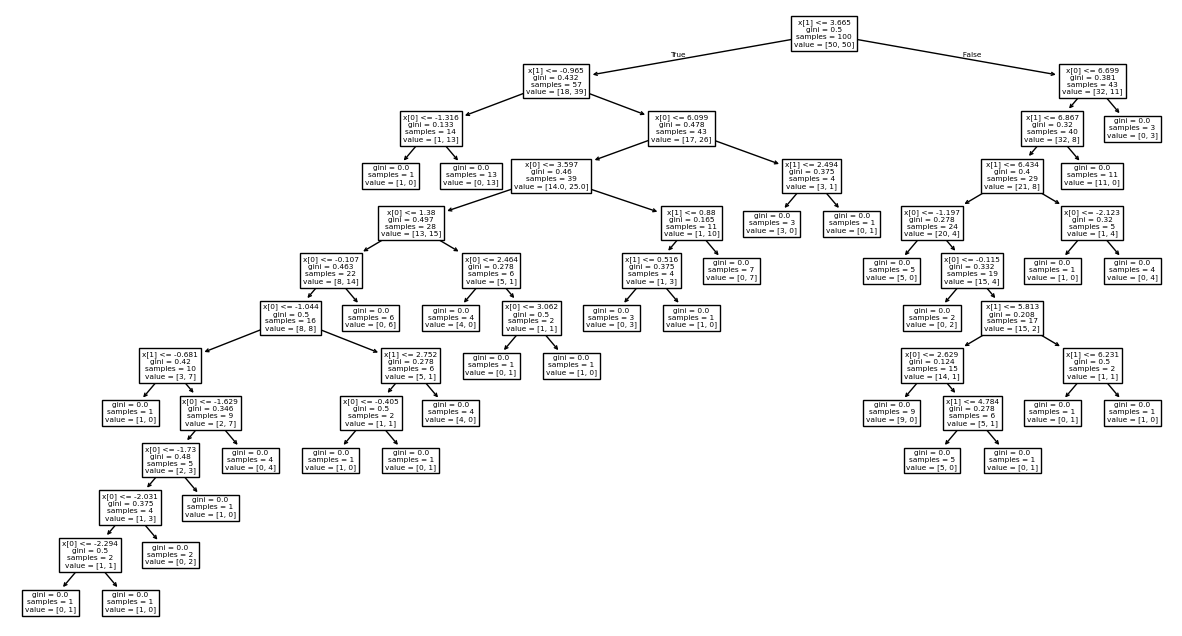

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=50)
tree_clf.fit(x, y)

fig, ax = plt.subplots(figsize=(15, 8))
tree.plot_tree(tree_clf)

C:\Users\Notebook\AppData\Local\Temp\ipykernel_24500\3291922330.py:14: UserWarning: The following kwargs were not used by contour: 'allpha'
  ax.contourf(xx, yy, Z, allpha=0.4)


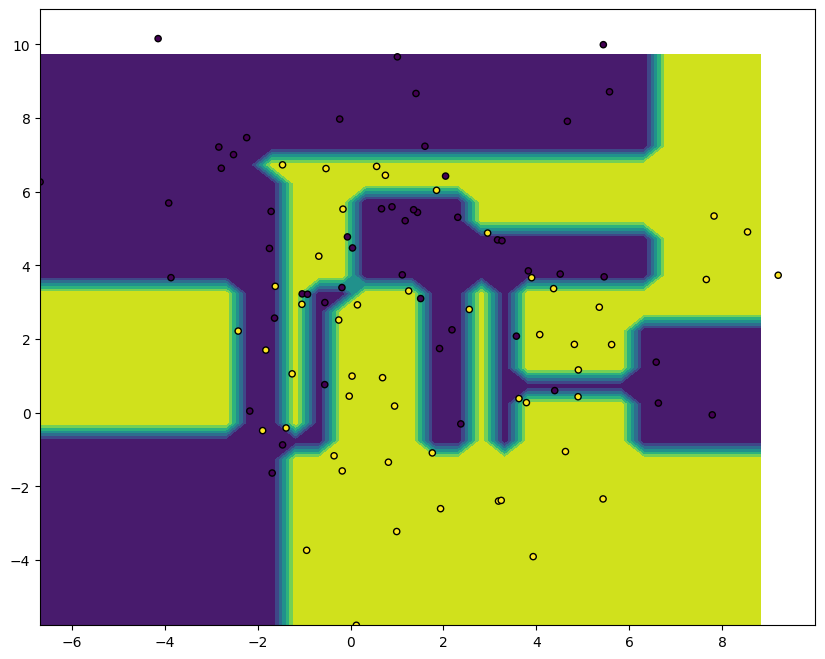

In [11]:
x0_min, x0_max = x[:, 0].min(), x[:, 0].max()
x1_min, x1_max = x[:, 1].min(), x[:, 1].max()

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, 0.5), 
    np.arange(x1_min, x1_max, 0.5),
)

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, allpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors="k")
plt.show()

## Regression models


In [12]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
x = np.sort(5* rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()

y[::5] += 3 * (0.5 -np.random.rand(16))


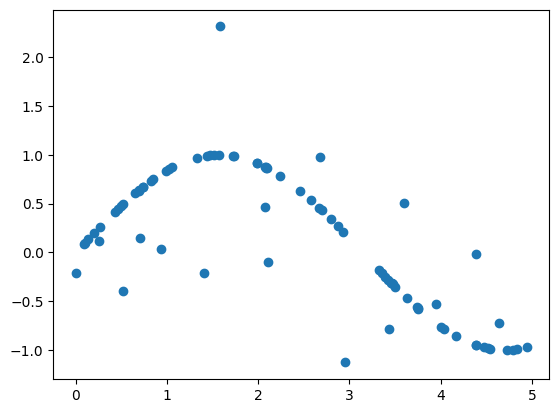

In [13]:
plt.scatter(x, y)

In [14]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.94\nsquared_error = 0.507\nsamples = 80\nvalue = 0.133'),
 Text(0.25, 0.5, 'x[0] <= 0.514\nsquared_error = 0.199\nsamples = 50\nvalue = 0.578'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.065\nsamples = 11\nvalue = 0.147'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.169\nsamples = 39\nvalue = 0.7'),
 Text(0.75, 0.5, 'x[0] <= 3.975\nsquared_error = 0.139\nsamples = 30\nvalue = -0.609'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.11\nsamples = 16\nvalue = -0.396'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.062\nsamples = 14\nvalue = -0.852')]

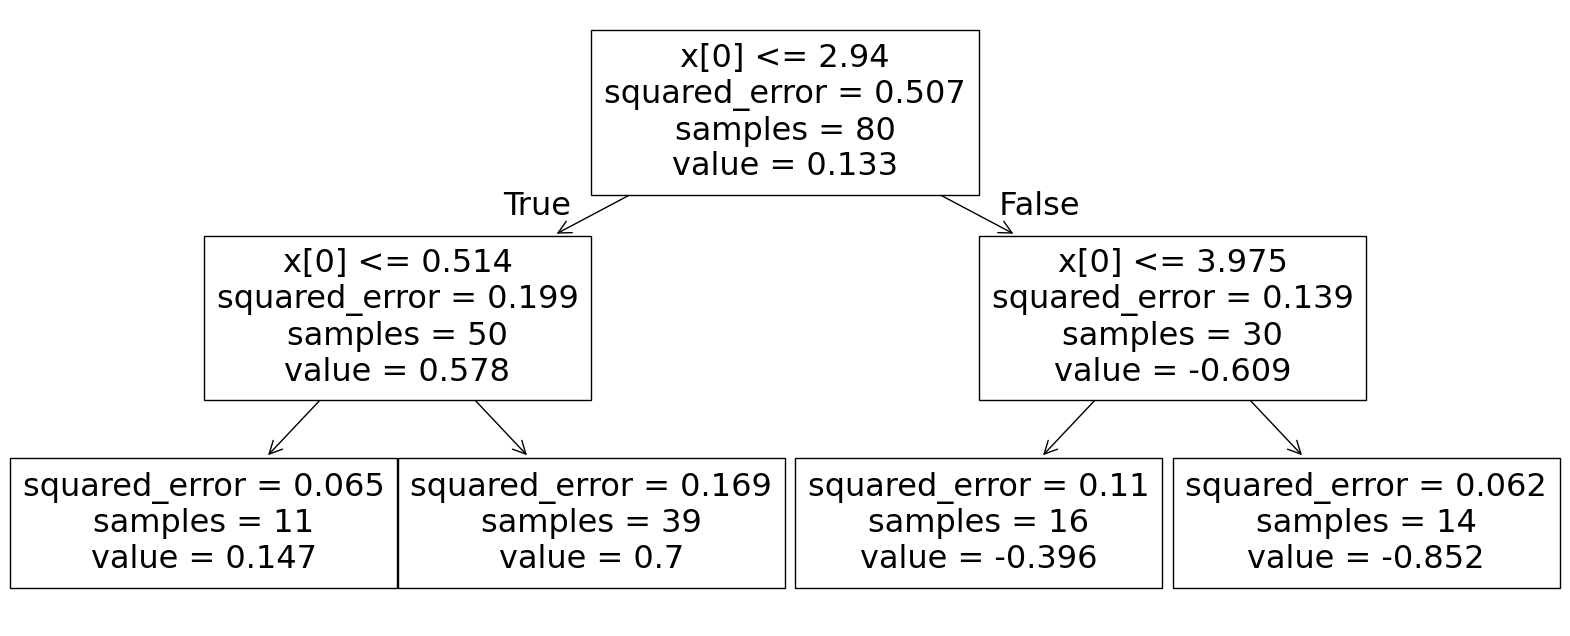

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_1)

[Text(0.475, 0.9166666666666666, 'x[0] <= 2.94\nsquared_error = 0.507\nsamples = 80\nvalue = 0.133'),
 Text(0.24375, 0.75, 'x[0] <= 0.514\nsquared_error = 0.199\nsamples = 50\nvalue = 0.578'),
 Text(0.359375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[0] <= 0.502\nsquared_error = 0.065\nsamples = 11\nvalue = 0.147'),
 Text(0.1, 0.4166666666666667, 'x[0] <= 0.258\nsquared_error = 0.039\nsamples = 10\nvalue = 0.201'),
 Text(0.05, 0.25, 'x[0] <= 0.046\nsquared_error = 0.017\nsamples = 6\nvalue = 0.07'),
 Text(0.025, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = -0.214'),
 Text(0.075, 0.08333333333333333, 'squared_error = 0.001\nsamples = 5\nvalue = 0.126'),
 Text(0.15, 0.25, 'x[0] <= 0.346\nsquared_error = 0.007\nsamples = 4\nvalue = 0.398'),
 Text(0.125, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 0.264'),
 Text(0.175, 0.08333333333333333, 'squared_error = 0.001\nsamples = 3\nvalue = 0.443'),
 Text(0.15, 0.4166666666666667, 's

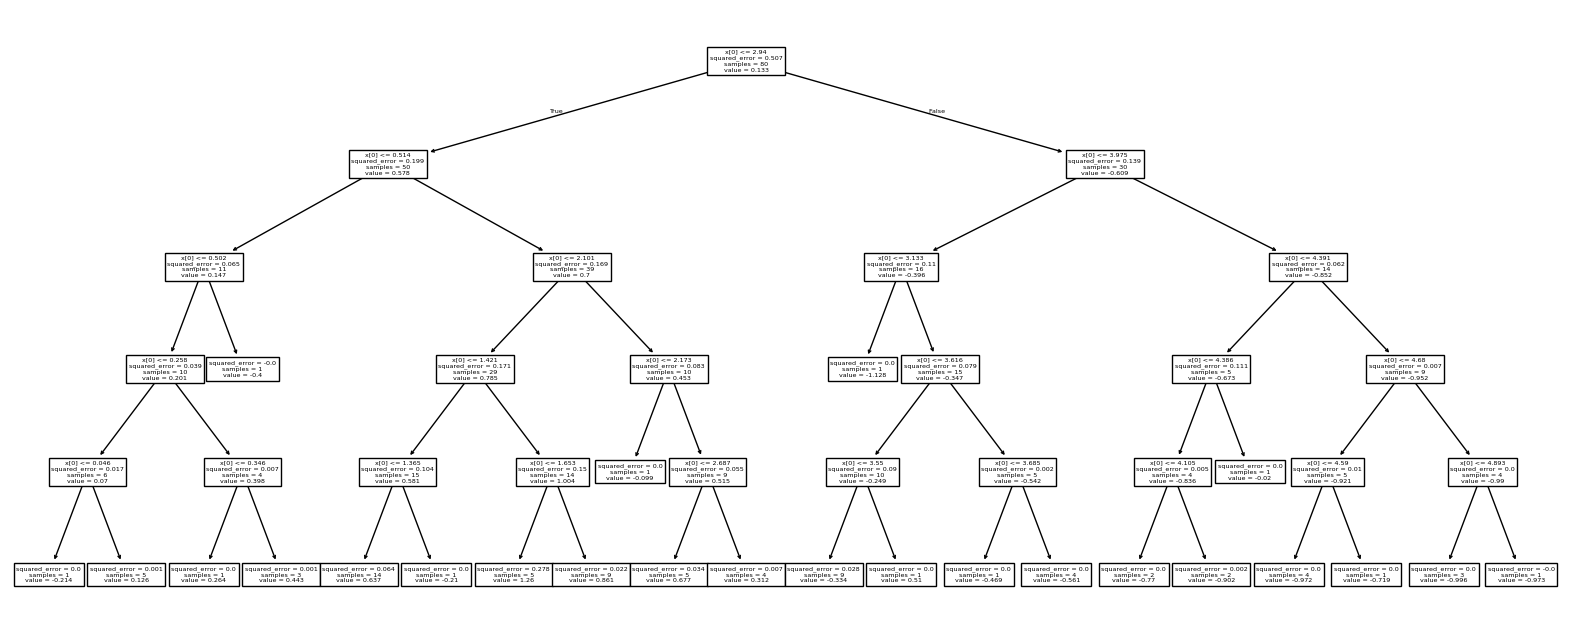

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_2)

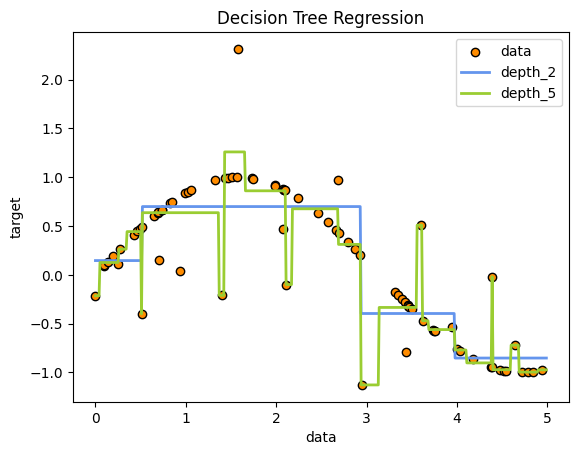

In [17]:
x_test = np.arange(0, 5, 0.01)[: ,np.newaxis]

y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


plt.figure()
plt.scatter(x, y, edgecolors="black", c="darkorange", label= "data")
plt.plot(x_test, y_1, color="cornflowerblue", label= "depth_2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label= "depth_5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Ensemble Learning

In [18]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
data = breast_cancer["data"]

In [19]:
from sklearn.model_selection import train_test_split

x = data[:, 3:5]
y = breast_cancer["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
tree_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
svc_clf =SVC()


voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('tree', tree_clf), ('svc', svc_clf)],
    voting = "hard"
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC())])

In [22]:
from sklearn.metrics import accuracy_score

for clf in (lr_clf, tree_clf, svc_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_pred, y_test)}")

LogisticRegression accuracy: 0.8187134502923976
DecisionTreeClassifier accuracy: 0.8187134502923976
SVC accuracy: 0.8538011695906432
VotingClassifier accuracy: 0.8245614035087719


## Random Forest

In [23]:
breast_cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
x = breast_cancer["data"][:, 0:2]
y = breast_cancer["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
)

tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=40)

C:\Users\Notebook\AppData\Local\Temp\ipykernel_24500\3291922330.py:14: UserWarning: The following kwargs were not used by contour: 'allpha'
  ax.contourf(xx, yy, Z, allpha=0.4)


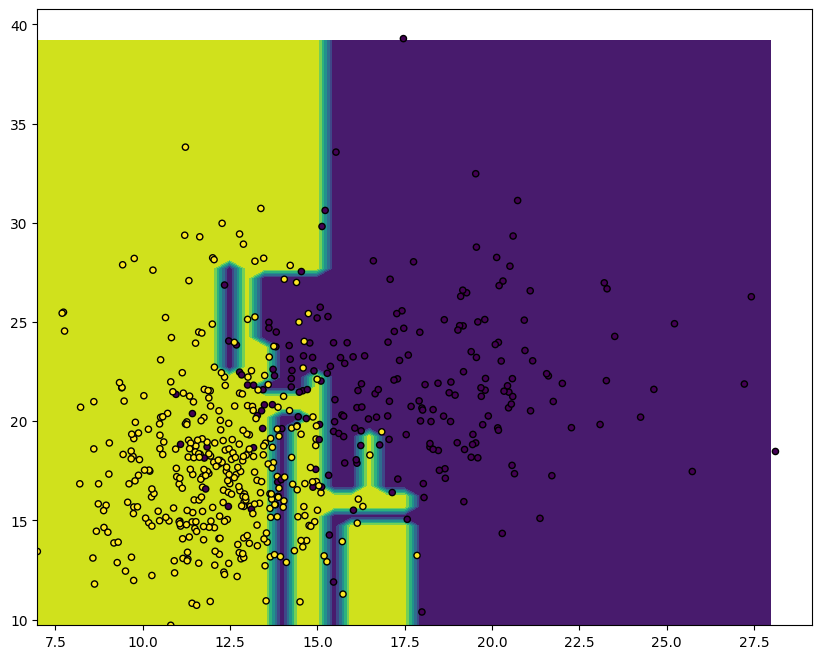

In [26]:
x0_min, x0_max = x[:, 0].min(), x[:, 0].max()
x1_min, x1_max = x[:, 1].min(), x[:, 1].max()

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, 0.5), 
    np.arange(x1_min, x1_max, 0.5),
)

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, allpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors="k")
plt.show()

C:\Users\Notebook\AppData\Local\Temp\ipykernel_24500\2556798912.py:14: UserWarning: The following kwargs were not used by contour: 'allpha'
  ax.contourf(xx, yy, Z, allpha=0.4)


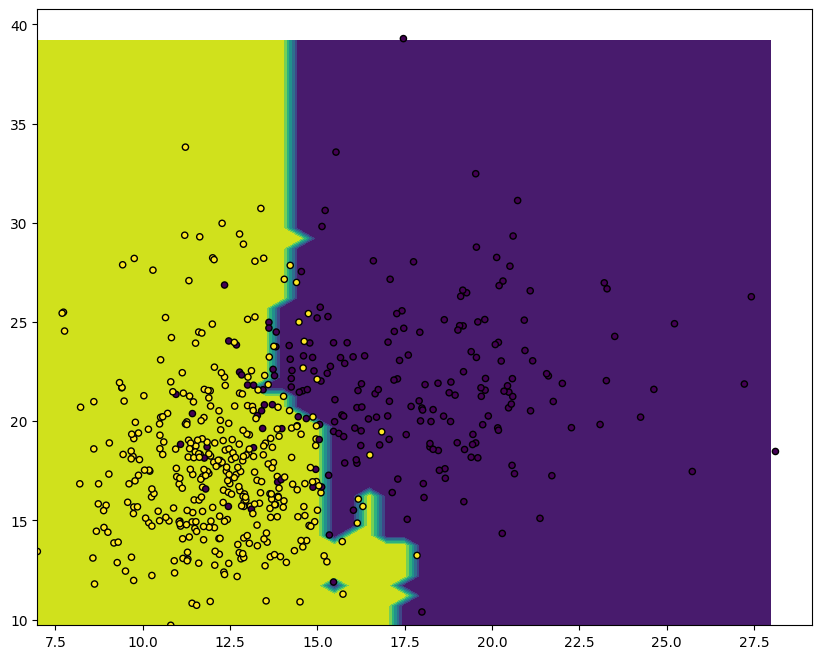

In [27]:
x0_min, x0_max = x[:, 0].min(), x[:, 0].max()
x1_min, x1_max = x[:, 1].min(), x[:, 1].max()

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, 0.5), 
    np.arange(x1_min, x1_max, 0.5),
)

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, allpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors="k")
plt.show()

In [28]:
for clf in [bag_clf, tree_clf]:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_pred, y_test)}")

BaggingClassifier accuracy: 0.9020979020979021
DecisionTreeClassifier accuracy: 0.8601398601398601


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rnf_clf = RandomForestClassifier()
rnf_clf.fit(x_train, y_train)

print(f"""Random Forrest Classifier accuracy: {
    accuracy_score(
        rnf_clf.predict(x_test),
        y_test
    )
}""")

Random Forrest Classifier accuracy: 0.9020979020979021


## Feature Importance

In [34]:
breast_cancer = load_breast_cancer()
x = breast_cancer["data"]
y = breast_cancer["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
rdn_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rdn_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

In [36]:
rdn_clf.feature_importances_

array([0.04668006, 0.01289401, 0.05651659, 0.05781912, 0.0058747 ,
       0.01158063, 0.03915809, 0.08572789, 0.00432039, 0.00348507,
       0.01320988, 0.00316358, 0.01078957, 0.03176277, 0.00361283,
       0.00417229, 0.00737566, 0.00354802, 0.00379889, 0.00362524,
       0.12495386, 0.01876197, 0.13807898, 0.12194684, 0.01185737,
       0.01723496, 0.03367154, 0.10578732, 0.01291177, 0.00568009])

In [40]:
import pandas as pd

feature_importances = pd.DataFrame(
    rdn_clf.feature_importances_,
    index=breast_cancer["feature_names"],
    columns=["Importances"],
).sort_values(
    'Importances',
    ascending=False
)
feature_importances

,Importances
worst perimeter,0.138079
worst radius,0.124954
worst area,0.121947
worst concave points,0.105787
mean concave points,0.085728
mean area,0.057819
mean perimeter,0.056517
mean radius,0.046680
mean concavity,0.039158
worst concavity,0.033672


<Axes: >

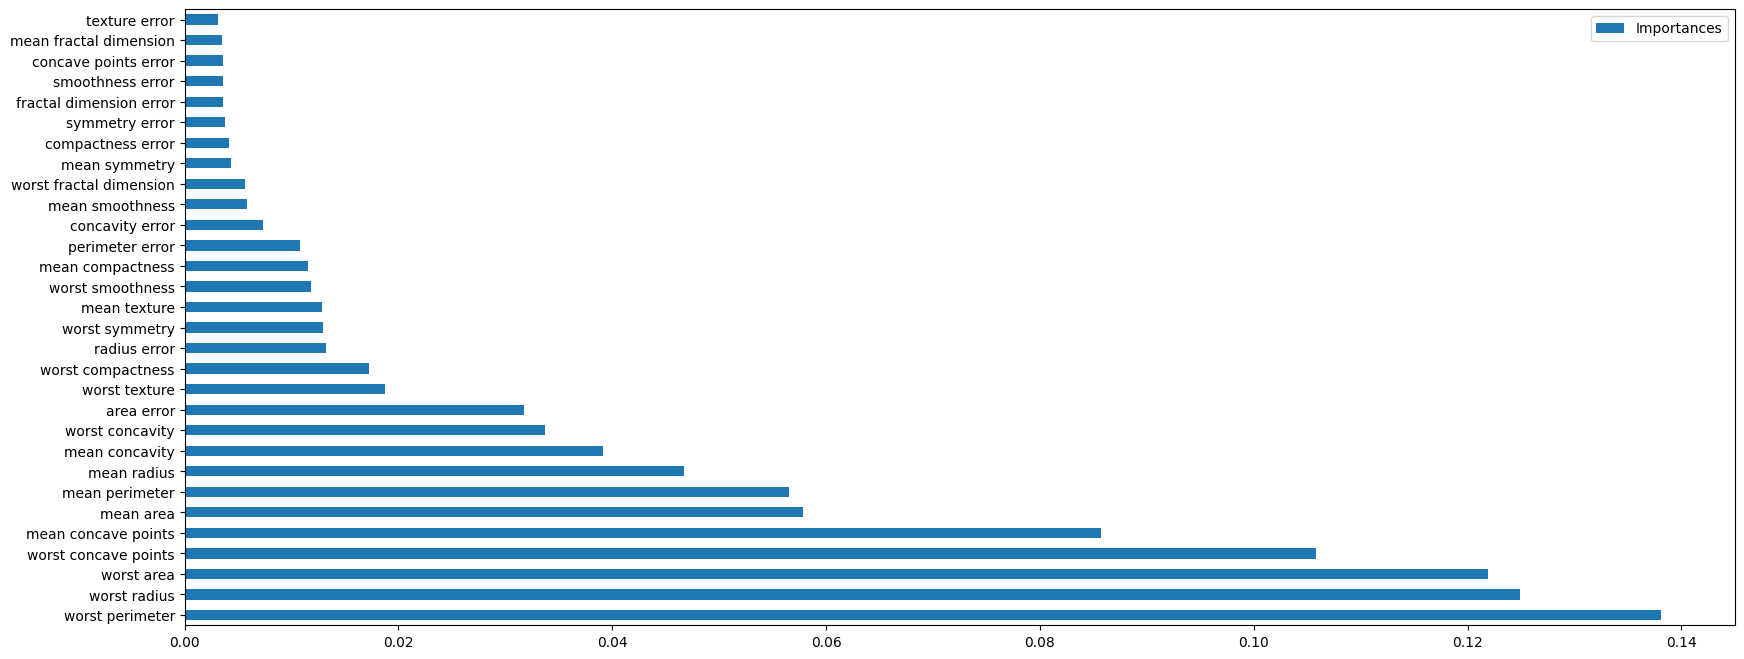

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))

feature_importances.plot(kind="barh", ax=ax)